In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA

plt.style.use('bmh')

In [2]:
data = pd.read_csv('yfdata/sp500_comps.csv', parse_dates=['Date'], index_col=['Date'])
print(data.shape)
data.head()

(1262, 494)


,MMM,AOS,ABT,ABBV,ABMD,ACN,ATVI,ADM,ADBE,ADP,...,WMB,WTW,WYNN,XEL,XYL,YUM,ZBRA,ZBH,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2017-03-16,164.992310,48.105995,41.482277,52.188644,123.970001,115.456360,47.647846,38.498363,127.010002,94.584946,...,21.149691,121.000206,102.611176,37.994030,46.323086,58.561855,90.750000,113.558990,38.701851,52.387356
2017-03-17,164.992310,48.105995,41.482277,52.188644,123.970001,115.456360,47.647846,38.498363,127.010002,94.584946,...,21.149691,121.000206,102.611176,37.994030,46.323086,58.561855,90.750000,113.558990,38.701851,52.387356
2017-03-20,165.549866,48.078339,41.289509,52.276047,123.589996,114.691086,47.482979,38.610275,126.309998,93.991028,...,21.275536,121.214340,103.961433,37.768753,46.012131,58.745235,90.070000,113.540321,38.197727,52.658989
2017-03-21,164.795029,46.990253,41.124275,51.918518,122.269997,114.921570,46.765305,38.696362,125.070000,92.794212,...,20.994228,120.283287,104.063881,38.435928,45.286579,58.433502,86.150002,112.914978,36.119370,51.795582
2017-03-22,164.872238,47.027138,41.133453,52.053585,123.470001,116.618141,47.211426,39.264538,126.209999,93.298126,...,21.053453,120.432259,105.553818,38.565891,46.436161,58.057568,86.860001,113.288300,36.022083,52.261242


In [3]:
returns = np.log(data / data.shift(1)).dropna()
print(returns.shape)
returns.head()

(1261, 494)


,MMM,AOS,ABT,ABBV,ABMD,ACN,ATVI,ADM,ADBE,ADP,...,WMB,WTW,WYNN,XEL,XYL,YUM,ZBRA,ZBH,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2017-03-17,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2017-03-20,0.003374,-0.000575,-0.004658,0.001673,-0.003070,-0.006650,-0.003466,0.002903,-0.005527,-0.006299,...,0.005933,0.001768,0.013073,-0.005947,-0.006735,0.003126,-0.007521,-0.000164,-0.013111,0.005172
2017-03-21,-0.004570,-0.022892,-0.004010,-0.006863,-0.010738,0.002008,-0.015230,0.002227,-0.009866,-0.012815,...,-0.013310,-0.007711,0.000985,0.017511,-0.015894,-0.005321,-0.044497,-0.005523,-0.055947,-0.016532
2017-03-22,0.000468,0.000785,0.000223,0.002598,0.009767,0.014655,0.009494,0.014576,0.009074,0.005416,...,0.002817,0.001238,0.014216,0.003376,0.025068,-0.006454,0.008208,0.003301,-0.002697,0.008950
2017-03-23,-0.000416,0.005280,-0.000893,0.001982,0.002265,-0.046279,0.002052,0.000000,0.005216,-0.001545,...,-0.001408,-0.001315,-0.009128,0.001572,-0.007945,-0.002213,0.000230,-0.008106,0.003921,-0.001300


In [4]:
scale_pca = make_pipeline(StandardScaler(), PCA(n_components='mle'))
scale_pca.fit(returns)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('pca', PCA(n_components='mle'))])

In [5]:
transformed_features = scale_pca.transform(returns)
print(transformed_features.shape)
transformed_features

(1261, 213)


array([[ 5.43853476e-01,  2.85648964e-01,  1.36530437e-01, ...,
        -8.22527573e-03, -7.53375221e-03,  5.17342781e-03],
       [ 3.37525248e+00,  2.37821176e-01, -1.00868559e+00, ...,
         1.39885207e-01, -1.00616980e-01,  1.46589103e-01],
       [ 1.50458101e+01, -3.35746461e+00,  6.95878763e+00, ...,
        -1.38116661e-01,  6.68695309e-01, -7.75145207e-01],
       ...,
       [ 2.51898183e+00,  7.75569274e-01,  7.11836542e+00, ...,
         1.08440768e+00, -1.65288526e-01, -6.00861174e-01],
       [-1.74636346e+01, -7.65943789e+00, -5.22511142e+00, ...,
         3.76040475e-01, -2.44887386e-01, -1.70559298e-03],
       [-2.06451863e+01,  1.65286825e+00, -1.20361150e+01, ...,
        -6.47626249e-01,  4.49428472e-01, -5.48206049e-01]])

In [6]:
pca_df = pd.DataFrame(transformed_features, index=returns.index)
print(pca_df.shape)
pca_df.head()

(1261, 213)


,0,1,2,3,4,5,6,7,8,9,...,203,204,205,206,207,208,209,210,211,212
Date,,,,,,,,,,,,,,,,,,,,,
2017-03-17,0.543853,0.285649,0.136530,0.041270,-0.003229,-0.045161,0.073519,0.086879,-0.013881,0.000601,...,0.001442,0.009387,0.000792,0.008228,-0.011701,0.003827,-0.002203,-0.008225,-0.007534,0.005173
2017-03-20,3.375252,0.237821,-1.008686,-0.092009,-0.361598,0.078902,1.797944,-0.141956,-1.108615,0.940109,...,0.017924,-0.093278,-0.441126,-0.002088,-0.164120,0.019829,0.162065,0.139885,-0.100617,0.146589
2017-03-21,15.045810,-3.357465,6.958788,-5.177240,-1.665856,0.404129,1.803089,0.000484,-3.358306,-1.578285,...,-0.185864,0.159270,-0.608561,-0.376078,0.253781,0.089809,-0.354688,-0.138117,0.668695,-0.775145
2017-03-22,-2.573282,-1.430262,-1.666176,-0.986183,0.199302,-0.906422,0.676037,-0.271831,-0.204773,-1.041645,...,0.087024,-0.639153,0.522536,-0.534702,-0.656329,-0.497926,-0.588133,-0.288627,-0.360694,0.017837
2017-03-23,0.485821,1.726814,0.775817,-0.978780,1.300954,-0.543908,0.592429,-0.144961,0.633042,0.885733,...,-0.084082,-0.156802,-0.295231,0.402262,0.519488,0.160191,0.269936,0.001953,-0.266446,0.203750


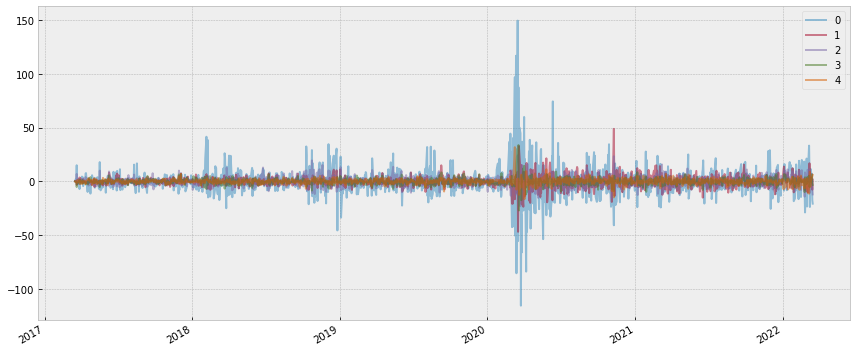

In [7]:
pca_df.iloc[:, :5].plot(alpha=0.5, figsize=(12,5), xlabel='')
plt.tight_layout()
plt.show()

In [8]:
explain_var_ratio = scale_pca['pca'].explained_variance_ratio_

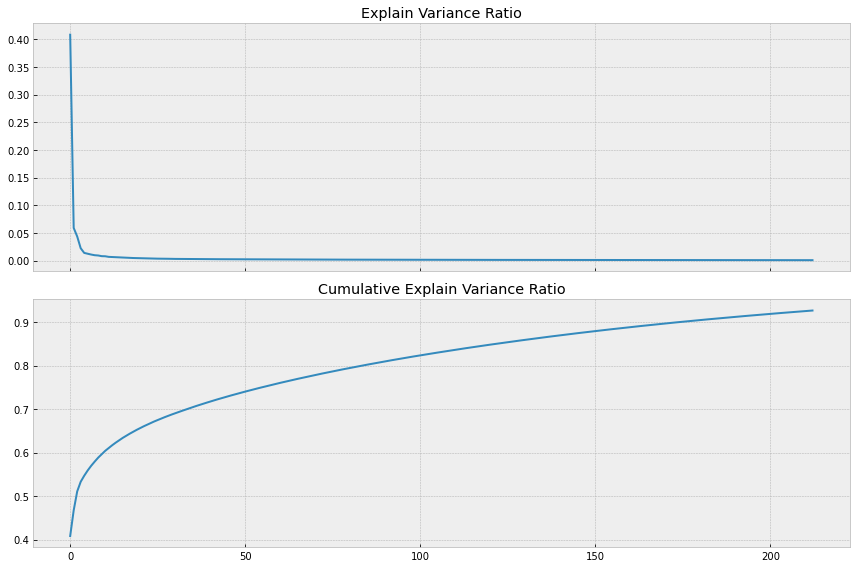

In [9]:
fig, ax = plt.subplots(2, 1, figsize=(12,8), sharex=True)

ax[0].plot(explain_var_ratio)
ax[0].set_title('Explain Variance Ratio')

ax[1].plot(np.cumsum(explain_var_ratio))
ax[1].set_title('Cumulative Explain Variance Ratio')

plt.tight_layout()
plt.show()